In [24]:
# Imports
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [17]:
train_df = pd.read_csv('data/train.tsv', delimiter = '\t', encoding = 'utf-8')
test_df = pd.read_csv('data/test.tsv', delimiter = '\t', encoding = 'utf-8')

# Get some basic info
print("Train data dimensions: " + str(train_df.shape))
print("Train columns: " + str(train_df.columns.values))

print("Test data dimensions: " + str(test_df.shape))
print("Test columns: " + str(test_df.columns.values))


Train data dimensions: (156060, 4)
Train columns: ['PhraseId' 'SentenceId' 'Phrase' 'Sentiment']
Test data dimensions: (66292, 3)
Test columns: ['PhraseId' 'SentenceId' 'Phrase']


In [18]:
sample_submission_df = pd.read_csv('data/sampleSubmission.csv', delimiter = ',', encoding = 'utf-8')
print("Sample submission data dimensions: " + str(sample_submission_df.shape))
print("Sample submission columns: " + str(sample_submission_df.columns.values))

Sample submission data dimensions: (66292, 2)
Sample submission columns: ['PhraseId' 'Sentiment']


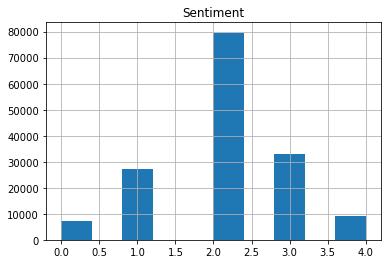

In [35]:
# Visualize the distribution of our dataset in sentiment.

train_df.hist(column = "Sentiment")
plt.show()

In [19]:
# Split our data into a train and validation set
X_train, X_val, y_train, y_val = train_test_split(
    train_df.drop(['Sentiment'], axis = 1), 
    train_df['Sentiment'], 
    test_size = 0.2, 
    random_state = 42)

In [20]:
# Define a super basic model that only returns neutral sentiment
class NaiveModel():
    def predict(self, phrases):
        return np.full((len(phrases), 1), 2)

In [21]:
# Use the naive model to run a predication on our cross validation dataset
naive_model = NaiveModel()
predictions = naive_model.predict(train_df['Phrase'])
print(len(predictions))

156060


In [22]:
# With these, we now have a basic benchmark that we want to outperform
print("Accuracy: " + str(metrics.accuracy_score(train_df['Sentiment'], predictions)))
print(metrics.classification_report(train_df['Sentiment'], predictions))

Accuracy: 0.50994489299
             precision    recall  f1-score   support

          0       0.00      0.00      0.00      7072
          1       0.00      0.00      0.00     27273
          2       0.51      1.00      0.68     79582
          3       0.00      0.00      0.00     32927
          4       0.00      0.00      0.00      9206

avg / total       0.26      0.51      0.34    156060



/Users/hdavidzhu/miniconda3/envs/ml_is/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Now that we have our baseline, let's improve upon our model to get higher accuracy.